## Import libraries

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Import preprocessed data training




In [16]:
train = pd.read_csv('./preprocessed_application_train.csv')
test = pd.read_csv('./preprocessed_application_test.csv')

## Data visualization


In [17]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65789 entries, 0 to 65788
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    65789 non-null  int64  
 1   CODE_GENDER                   65789 non-null  float64
 2   FLAG_OWN_CAR                  65789 non-null  float64
 3   FLAG_OWN_REALTY               65789 non-null  float64
 4   CNT_CHILDREN                  65789 non-null  float64
 5   AMT_INCOME_TOTAL              65789 non-null  float64
 6   AMT_CREDIT                    65789 non-null  float64
 7   AMT_ANNUITY                   65789 non-null  float64
 8   AMT_GOODS_PRICE               65789 non-null  float64
 9   NAME_INCOME_TYPE              65789 non-null  float64
 10  NAME_EDUCATION_TYPE           65789 non-null  float64
 11  NAME_FAMILY_STATUS            65789 non-null  float64
 12  REGION_POPULATION_RELATIVE    65789 non-null  float64
 13  D

In [18]:
train.describe()

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,65789.000000,65789.000000,65789.000000,6.578900e+04,65789.000000,65789.000000,6.578900e+04,65789.000000,6.578900e+04,65789.000000,65789.000000,65789.000000,6.578900e+04,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,6.578900e+04,65789.000000,6.578900e+04,65789.000000
mean,153664.444147,0.376355,0.369849,0.693338,0.472693,-1.022093e-15,-6.751069e-17,-1.970174e-16,1.880237e-15,3.572071,2.991488,1.386493,-6.766371e-16,-14919.246409,-2464.831142,-1.124196e-16,-2830.820061,6.369274e-16,0.211023,0.301813,7.770889,-1.011525e-15,1.975513,1.925367,3.075757,12.321118,23.326742,7.497553e-16,8.648348e-16,1.064089e-15,1.196908e-16,1.857634e-16,2.976100e-15,4.956908e-16,-1.199284e-16,1.835127e-15,-1.898495e-16,-3.320856e-16,6.321904e-17,3.103128e-16,-7.083032e-17,-7.816737e-18,6.143665e-16,2.928940e-15,8.981189e-17,-1.051734e-16,-4.677821e-15,9.129350e-16,-9.434170e-17,1.670011e-15,5.370294e-17,-1.095483e-15,-1.258407e-15,-1.069118e-16,3.191223e-16,1.117159e-16,-3.709744e-16,5.035121e-16,-8.228457e-17,-1.734977e-16,3.593134e-15,1.065342e-15,-2.846536e-16,1.728643e-16,3.287518e-16,-3.255927e-16,-4.321122e-16,-9.728732e-19,6.633004e-17,-2.132930e-16,6.957984e-17,3.306546e-15,3.955620e-17,-6.753985e-16,-9.913688e-16,1.492571e-16,0.737145,5.923321e-16,0.075803
std,88991.321254,0.484506,0.482767,0.461111,0.724501,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.830316,1.382754,0.976230,1.000008e+00,3681.828421,2421.353454,1.000008e+00,1526.071395,1.000008e+00,0.408038,0.459048,4.378595,1.000008e+00,0.562443,0.541655,2.140475,3.355835,17.676347,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008

## Separate target variable from others

In [19]:
X_train, y_train = train.iloc[:,:-1],train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1],test.iloc[:,-1]

## Dataset conversion to Dmatrix 

In [20]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

## Instanciate XGboost classification object 

In [21]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

## Fit classification object to the training set 

In [22]:
xg_class.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Save model

In [23]:
xg_class.save_model('model.json')

## Boosting Tree Visualization 

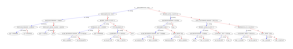

In [24]:
xgb.plot_tree(xg_class,num_trees=0)
#plt.rcParams['figure.figsize'] = [500, 400]
plt.show()

## Features Visualization

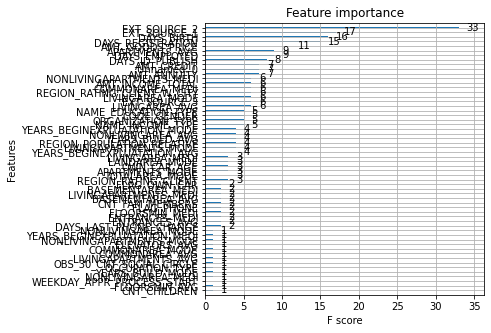

In [25]:
xgb.plot_importance(xg_class)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()